In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import Series,DataFrame
np.random.seed(42)
sur=pd.read_csv('train.csv')

In [3]:
sur.groupby('Pclass').mean()

,PassengerId,Survived,Age,SibSp,Parch,Fare
Pclass,,,,,,
1,461.597222,0.629630,38.233441,0.416667,0.356481,84.154687
2,445.956522,0.472826,29.877630,0.402174,0.380435,20.662183
3,439.154786,0.242363,25.140620,0.615071,0.393075,13.675550


In [4]:
class_sex_grouping = sur.groupby(['Pclass','Sex']).mean()

PassengerId  Survived        Age     SibSp     Parch  \
Pclass Sex                                                            
1      female   469.212766  0.968085  34.611765  0.553191  0.457447   
       male     455.729508  0.368852  41.281386  0.311475  0.278689   
2      female   443.105263  0.921053  28.722973  0.486842  0.605263   
       male     447.962963  0.157407  30.740707  0.342593  0.222222   
3      female   399.729167  0.500000  21.750000  0.895833  0.798611   
       male     455.515850  0.135447  26.507589  0.498559  0.224784   

                     Fare  
Pclass Sex                 
1      female  106.125798  
       male     67.226127  
2      female   21.970121  
       male     19.741782  
3      female   16.118810  
       male     12.661633

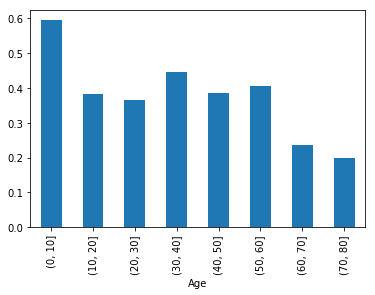

In [5]:
group_by_age = pd.cut(sur['Age'], np.arange(0, 90, 10))
age_grouping = sur.groupby(group_by_age).mean()
age_grouping['Survived'].plot.bar()
plt.show()

In [4]:
mapping = {'male':1, 'female':2}
sur.replace({'Sex':mapping}, inplace = True)

In [7]:
sur.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,1.352413,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,0.477990,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,1.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,1.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,2.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,2.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
mapping={'Q':3,'S':1,'C':2}
sur.replace({'Embarked':mapping},inplace=True)

In [6]:
sur['Embarked'].fillna(sur['Embarked'].mode()[0],inplace=True)

In [7]:
sur['Relatives']=sur['Parch']+sur['SibSp']

In [8]:
from sklearn.ensemble import RandomForestRegressor

age = sur[['Age','Fare', 'Relatives', 'Pclass', 'Sex','Embarked']]
known_age = age[age['Age'].notnull()].as_matrix()
unknown_age = age[age['Age'].isnull()].as_matrix()
known_age 

array([[ 22.    ,   7.25  ,   1.    ,   3.    ,   1.    ,   1.    ],
       [ 38.    ,  71.2833,   1.    ,   1.    ,   2.    ,   2.    ],
       [ 26.    ,   7.925 ,   0.    ,   3.    ,   2.    ,   1.    ],
       ..., 
       [ 19.    ,  30.    ,   0.    ,   1.    ,   2.    ,   1.    ],
       [ 26.    ,  30.    ,   0.    ,   1.    ,   1.    ,   2.    ],
       [ 32.    ,   7.75  ,   0.    ,   3.    ,   1.    ,   3.    ]])

In [9]:
y1 = known_age[:, 0] #所有行的第0列 
X1 = known_age[:, 1:]#所有行的1-最后列
rfr = RandomForestRegressor(random_state=42, n_estimators=500)
rfr.fit(X1, y1)
pAge = rfr.predict(unknown_age[:, 1::])

In [10]:
sur.loc[(sur.Age.isnull()), 'Age']=pAge
#赋值

In [11]:
sur.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age            False
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked       False
Relatives      False
dtype: bool

In [12]:
sur.loc[ (sur.Cabin.notnull()), 'Cabin' ] = 1
sur.loc[ (sur.Cabin.isnull()), 'Cabin' ] = 0

In [13]:
AgeT=sur['Age']
AgeT=AgeT.values.reshape(-1,1)
FareT=sur['Fare']
FareT=FareT.values.reshape(-1,1)
ParchT=sur['Parch']
ParchT=ParchT.values.reshape(-1,1)
SibSpT=sur['SibSp']
SibSpT=SibSpT.values.reshape(-1,1)
RelativesT=sur['Relatives']
RelativesT=RelativesT.values.reshape(-1,1)

array([[ 22.        ],
       [ 38.        ],
       [ 26.        ],
       [ 35.        ],
       [ 35.        ],
       [ 33.53176376],
       [ 54.        ],
       [  2.        ],
       [ 27.        ],
       [ 14.        ],
       [  4.        ],
       [ 58.        ],
       [ 20.        ],
       [ 39.        ],
       [ 14.        ],
       [ 55.        ],
       [  2.        ],
       [ 31.7383562 ],
       [ 31.        ],
       [ 15.60408611],
       [ 35.        ],
       [ 34.        ],
       [ 15.        ],
       [ 28.        ],
       [  8.        ],
       [ 38.        ],
       [ 32.57099026],
       [ 19.        ],
       [ 19.98315595],
       [ 27.13277078],
       [ 40.        ],
       [ 44.3144    ],
       [ 22.44066014],
       [ 66.        ],
       [ 28.        ],
       [ 42.        ],
       [ 24.77199671],
       [ 21.        ],
       [ 18.        ],
       [ 14.        ],
       [ 40.        ],
       [ 27.        ],
       [ 31.98866288],
       [  3

In [14]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

C:\Users\dymyq\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [15]:
sur['AgeT']=AgeT
sur['FareT']=FareT
sur['ParchT']=ParchT
sur['SibSpT']=SibSpT
sur['RT']=RelativesT

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [16]:
sur.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 18 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null int64
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          891 non-null object
Embarked       891 non-null float64
Relatives      891 non-null int64
AgeT           891 non-null float64
FareT          891 non-null float64
ParchT         891 non-null float64
SibSpT         891 non-null float64
RT             891 non-null float64
dtypes: float64(8), int64(7), object(3)
memory usage: 125.4+ KB


In [17]:
z = sur['Survived']

In [18]:
cols1 = ['Pclass','AgeT','Sex','SibSpT','ParchT','FareT','Cabin','Embarked']
U1 = sur[cols1]
cols2=['Pclass','AgeT','Sex','FareT','Embarked']
U2 = sur[cols2]
cols3 = ['Pclass','AgeT','Sex','SibSpT','ParchT','FareT','Embarked']
U3 = sur[cols3]
cols4 = ['Pclass','AgeT','Sex','FareT','Cabin']
U4 = sur[cols4]
cols5 = ['Pclass','AgeT','Sex','FareT','Cabin','Embarked']
U5=sur[cols5]
cols6= ['Pclass','AgeT','Sex','SibSpT','ParchT']
U6=sur[cols6]
cols7 = ['Pclass','Age','Sex','RT']
U7=sur[cols7]
cols8 = ['Pclass','AgeT','Sex','Cabin','Embarked']
U8=sur[cols8]
cols9 =['Pclass','AgeT','Sex','RT','FareT']
U9=sur[cols9]
cols10 =['Pclass','AgeT','Sex','RT','FareT','Cabin']
U10=sur[cols10]
cols11 = ['Pclass','AgeT','Sex','FareT']
U11=sur[cols11]
cols12=['Pclass','Sex','SibSpT','ParchT','Cabin','Embarked']
U12=sur[cols12]
cols13=['Pclass','AgeT','Sex','RT','FareT','Embarked']
U13=sur[cols13]
cols14=['Pclass','AgeT','Sex','RT','Cabin']
U14=sur[cols14]
cols15=['Pclass','AgeT','Sex','RT','Embarked']
U15=sur[cols15]
cols16=['Pclass','AgeT','Sex','RT','Embarked','Cabin']
U16=sur[cols16]
cols17=['Pclass','AgeT','Sex','RT','FareT']
U17=sur[cols17]


In [19]:
sur.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Relatives', 'AgeT',
       'FareT', 'ParchT', 'SibSpT', 'RT'],
      dtype='object')

In [35]:
from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(U1,z, test_size=0.2, random_state =42)
X2_train, X2_test, y2_train, y2_test = train_test_split(U14,z, test_size =0.2, random_state =42)
X3 = sur[['Pclass','AgeT','Sex','FareT','Embarked']]
y3 = sur['Survived']
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.2, random_state=42)

In [39]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [47]:
tree = DecisionTreeClassifier(random_state=42)
grid_values = [
{'max_features':[3,4,5], 'max_depth': [10,30,50,80,100,200] }]
# default metric to optimize over grid parameters: accuracy
grid_clf_acc = GridSearchCV(tree, param_grid = grid_values)
grid_clf_acc.fit(X3,y3)
print('Grid best parameter (max. accuracy): ', grid_clf_acc.best_params_)
print('Grid best score (accuracy): ', grid_clf_acc.best_score_)

Grid best parameter (max. accuracy):  {'max_depth': 10, 'max_features': 4}
Grid best score (accuracy):  0.804713804714


In [51]:
rf=RandomForestClassifier(random_state=42)
grid_values = [
{'n_estimators': [10,30,50,80,100,150], 'max_features': [3,4,5], 'max_depth': [10,30,50,80,100,200] }]
grid_clf_acc = GridSearchCV(rf, param_grid = grid_values)
grid_clf_acc.fit(X3,y3)
print('Grid best parameter (max. accuracy): ', grid_clf_acc.best_params_)
print('Grid best score (accuracy): ', grid_clf_acc.best_score_)

Grid best parameter (max. accuracy):  {'max_depth': 10, 'max_features': 4, 'n_estimators': 100}
Grid best score (accuracy):  0.832772166105


In [50]:
knn = KNeighborsClassifier()

grid_values = {'n_neighbors': [2,3,4,5,6,7,8,9,10]}
# default metric to optimize over grid parameters: accuracy
grid_clf_acc = GridSearchCV(knn, param_grid = grid_values)
grid_clf_acc.fit(X3,y3)
print('Grid best parameter (max. accuracy): ', grid_clf_acc.best_params_)
print('Grid best score (accuracy): ', grid_clf_acc.best_score_)

Grid best parameter (max. accuracy):  {'n_neighbors': 4}
Grid best score (accuracy):  0.813692480359


In [29]:
from sklearn.ensemble import RandomForestClassifier
l1=[30,50,80,100,150,200]
l2=[3,4,5,6,7,8]
l3=[10,20,30,40,50]
for i in l1:
    for j in l2:
        for k in l3:
            rf=RandomForestClassifier(n_estimators=i,max_features=j,max_depth=k,random_state=42)
            rf.fit(X1_train,y1_train)
            print('n_estimator:',i,'max_features:',j,'max_depth:',k,rf.score(X1_test,y1_test))

n_estimator: 30 max_features: 3 max_depth: 10 0.826815642458
n_estimator: 30 max_features: 3 max_depth: 20 0.821229050279
n_estimator: 30 max_features: 3 max_depth: 30 0.832402234637
n_estimator: 30 max_features: 3 max_depth: 40 0.832402234637
n_estimator: 30 max_features: 3 max_depth: 50 0.832402234637
n_estimator: 30 max_features: 4 max_depth: 10 0.832402234637
n_estimator: 30 max_features: 4 max_depth: 20 0.787709497207
n_estimator: 30 max_features: 4 max_depth: 30 0.793296089385
n_estimator: 30 max_features: 4 max_depth: 40 0.793296089385
n_estimator: 30 max_features: 4 max_depth: 50 0.793296089385
n_estimator: 30 max_features: 5 max_depth: 10 0.815642458101
n_estimator: 30 max_features: 5 max_depth: 20 0.793296089385
n_estimator: 30 max_features: 5 max_depth: 30 0.787709497207
n_estimator: 30 max_features: 5 max_depth: 40 0.787709497207
n_estimator: 30 max_features: 5 max_depth: 50 0.787709497207
n_estimator: 30 max_features: 6 max_depth: 10 0.810055865922
n_estimator: 30 max_feat

n_estimator: 150 max_features: 5 max_depth: 50 0.810055865922
n_estimator: 150 max_features: 6 max_depth: 10 0.815642458101
n_estimator: 150 max_features: 6 max_depth: 20 0.793296089385
n_estimator: 150 max_features: 6 max_depth: 30 0.798882681564
n_estimator: 150 max_features: 6 max_depth: 40 0.798882681564
n_estimator: 150 max_features: 6 max_depth: 50 0.798882681564
n_estimator: 150 max_features: 7 max_depth: 10 0.826815642458
n_estimator: 150 max_features: 7 max_depth: 20 0.810055865922
n_estimator: 150 max_features: 7 max_depth: 30 0.810055865922
n_estimator: 150 max_features: 7 max_depth: 40 0.810055865922
n_estimator: 150 max_features: 7 max_depth: 50 0.810055865922
n_estimator: 150 max_features: 8 max_depth: 10 0.804469273743
n_estimator: 150 max_features: 8 max_depth: 20 0.798882681564
n_estimator: 150 max_features: 8 max_depth: 30 0.798882681564
n_estimator: 150 max_features: 8 max_depth: 40 0.798882681564
n_estimator: 150 max_features: 8 max_depth: 50 0.798882681564
n_estima

In [37]:
from sklearn.ensemble import ExtraTreesClassifier
l1=[50,100,150,200]
l2=[3,4,5,6,7,8]
l3=[10,15,20,30]
for i in l1:
    for j in l2:
        
        
        for k in l3:
            et=ExtraTreesClassifier(n_estimators=i,max_features=j,max_depth=k,random_state=42)
            et.fit(X1_train,y1_train)
            print('n_estimator:',i,'max_features:',j,'max_features:',k,'score:',et.score(X1_test,y1_test))

n_estimator: 50 max_features: 3 max_features: 10 score: 0.798882681564
n_estimator: 50 max_features: 3 max_features: 15 score: 0.849162011173
n_estimator: 50 max_features: 3 max_features: 20 score: 0.821229050279
n_estimator: 50 max_features: 3 max_features: 30 score: 0.826815642458
n_estimator: 50 max_features: 4 max_features: 10 score: 0.815642458101
n_estimator: 50 max_features: 4 max_features: 15 score: 0.837988826816
n_estimator: 50 max_features: 4 max_features: 20 score: 0.837988826816
n_estimator: 50 max_features: 4 max_features: 30 score: 0.821229050279
n_estimator: 50 max_features: 5 max_features: 10 score: 0.821229050279
n_estimator: 50 max_features: 5 max_features: 15 score: 0.837988826816
n_estimator: 50 max_features: 5 max_features: 20 score: 0.815642458101
n_estimator: 50 max_features: 5 max_features: 30 score: 0.821229050279
n_estimator: 50 max_features: 6 max_features: 10 score: 0.798882681564
n_estimator: 50 max_features: 6 max_features: 15 score: 0.826815642458
n_esti

In [52]:
from sklearn.svm import SVC

rf_clf=RandomForestClassifier(n_estimators=100, max_features=4, max_depth=10, random_state=42)#score:0.9642
et_clf=ExtraTreesClassifier(n_estimators=50, max_features=4, max_depth=15, random_state=42)#score:0.9665
#svm_clf=LinearSVC(C=100, loss="hinge",random_state=2017)#score:0.8752
#svc=SVC(C=0.001,kernel='linear',random_state=2017,probability=True) #score:0.9207
from sklearn.ensemble import VotingClassifier
votingh_clf=VotingClassifier(
    estimators=[('et',et_clf),('rf',rf_clf)], voting='hard')
votings_clf=VotingClassifier(
    estimators=[('et',et_clf),('rf',rf_clf)], voting='soft')
votingh_clf.fit(X3_train,y3_train)
print(votingh_clf.score(X3_test,y3_test))
votings_clf.fit(X3_train,y3_train)
print(votings_clf.score(X3_test,y3_test))

0.826815642458
0.810055865922


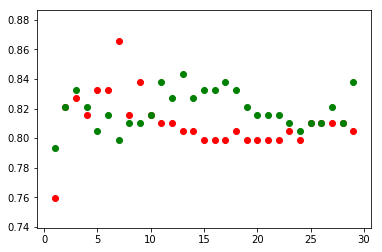

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
X1_train, X1_test, y1_train, y1_test = train_test_split(U2,z, test_size=0.2, random_state =42)
X2_train, X2_test, y2_train, y2_test = train_test_split(U14,z, test_size =0.2, random_state =42)

test1 = []
train1 = []
test2 = []
train2 = []

for n in range(1,30):
    knn = KNeighborsClassifier(n_neighbors = n)
    knn.fit(X1_train, y1_train)
    train1.append(knn.score(X1_train, y1_train))
    test1.append(knn.score(X1_test, y1_test))
    knn.fit(X2_train, y2_train)
    train2.append(knn.score(X2_train, y2_train))
    test2.append(knn.score(X2_test, y2_test))  
        
plt.scatter(range(1,30), test1, c='r')
plt.scatter(range(1,30), test2, c='g')

plt.show()
plt.xlabel('r:U2 g:U14')
plt.ylabel('accuracy')

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

X3 = sur[['Pclass','AgeT','Sex','FareT','Embarked']]
y3 = sur['Survived']
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.2, random_state=42)
knn = KNeighborsClassifier(7)


In [33]:
knn.fit(X3_train, y3_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=7, p=2,
           weights='uniform')

In [34]:
knn.score(X3_test, y3_test)

0.86592178770949724

In [ ]:
get_ipython().magic('matplotlib notebook')
import matplotlib.pyplot as plt
k_range = range(1,30)
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X3_train, y3_train)
    scores.append(knn.score(X3_test, y3_test))

plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,3,6,9,12,15,18,21,24,27])

In [ ]:
t = [0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2]

knn = KNeighborsClassifier(n_neighbors = 7)

plt.figure()

for s in t:

    scores = []
    for i in range(1,1000):
        X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size = 1-s)
        knn.fit(X3_train, y3_train)
        scores.append(knn.score(X3_test, y3_test))
    plt.plot(s, np.mean(scores), 'bo')

plt.xlabel('Training set proportion (%)')
plt.ylabel('accuracy')

In [70]:
psur=pd.read_csv('test.csv')

In [71]:
psur.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [72]:
psur.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [73]:
psur['Fare'].fillna(psur['Fare'].mean(),inplace=True)

In [74]:
psur['Relatives']=psur['SibSp']+psur['Parch']

In [75]:
mapping = {'male':1, 'female':2}
psur.replace({'Sex':mapping}, inplace = True)

In [76]:
mapping={'Q':3,'S':1,'C':2}
psur.replace({'Embarked':mapping},inplace=True)

In [77]:
age2 = psur[['Age','Fare', 'Relatives', 'Pclass', 'Sex','Embarked']]
known_age2 = age2[age2['Age'].notnull()].as_matrix()
#把age矩阵化，条件为age非nan
unknown_age2 = age2[age2['Age'].isnull()].as_matrix()

In [78]:
y4 = known_age2[:, 0]  
X4 = known_age2[:, 1:]


In [79]:
rfr = RandomForestRegressor(random_state=42, n_estimators=500)
rfr.fit(X4, y4)
pAge2 = rfr.predict(unknown_age2[:, 1::])

In [80]:
psur.loc[(psur.Age.isnull()), 'Age'] = pAge2

In [81]:
psur.loc[ (psur.Cabin.notnull()), 'Cabin' ] = 1
psur.loc[ (psur.Cabin.isnull()), 'Cabin' ] = 0

In [82]:
AgeT2=psur['Age']
AgeT2=AgeT2.values.reshape(-1,1)
FareT2=psur['Fare']
FareT2=FareT2.values.reshape(-1,1)
RT2=psur['Relatives']
RT2=RT2.values.reshape(-1,1)

In [83]:
AgeT2=scaler.fit_transform(AgeT2)
FareT2=scaler.fit_transform(FareT2)
RT2=scaler.fit_transform(RT2)

C:\Users\dymyq\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [84]:
AgeT2
psur['AgeT']=AgeT2
psur['FareT']=FareT2
psur['RT']=RT2

In [85]:
psur.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked', 'Relatives', 'AgeT', 'FareT',
       'RT'],
      dtype='object')

In [69]:
from sklearn.model_selection import train_test_split
X5 = psur[['Pclass','AgeT','Sex','FareT','Embarked']]
knn.fit(X3_train, y3_train)
knn.predict(X5)
psur['Survived']=knn.predict(X5)

In [87]:
rf_clf=RandomForestClassifier(n_estimators=100, max_features=4, max_depth=10, random_state=42)
rf_clf.fit(X3_train, y3_train)
rf_clf.predict(X5)
psur['Survived']=rf_clf.predict(X5)

In [88]:
psur[['PassengerId','Survived']].to_csv('p1r.csv',index=False)